In [20]:
#Getting the csv file into a pandas dataframe
import pandas as pd

file_path = 'mlb_games_stats.csv'

df = pd.read_csv(file_path)

df


,date,home_team,away_team,home_score,away_score,result_home,result_away,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
0,2025-03-01,Baltimore Orioles,Pittsburgh Pirates,2,5,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2025-03-01,Kansas City Royals,Chicago Cubs,1,11,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2025-03-01,Washington Nationals,Miami Marlins,7,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2025-03-01,Milwaukee Brewers,Texas Rangers,9,4,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2025-03-01,Seattle Mariners,Chicago White Sox,9,18,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,2025-07-21,Pittsburgh Pirates,Detroit Tigers,3,0,1,0,0.524590,0.507937,0.692541,3.903426,1.235377,0.693651,4.201286,1.277635
1865,2025-07-21,Cleveland Guardians,Baltimore Orioles,10,5,1,0,0.500000,0.444444,0.665375,4.135714,1.343661,0.653540,5.127810,1.457952
1866,2025-07-21,Seattle Mariners,Milwaukee Brewers,0,6,0,1,0.533333,0.516129,0.706633,3.729100,1.203550,0.739710,4.646823,1.401500
1867,2025-07-21,New York Mets,Los Angeles Angels,7,5,1,0,0.612903,0.415385,0.724694,3.105710,1.231274,0.695123,5.171446,1.524000


In [21]:
# Splitting the data into x and y
# the y is the results of the games, and the x is the rest of the data

y = df[['result_home', 'result_away']]
y

,result_home,result_away
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
1864,1,0
1865,1,0
1866,0,1
1867,1,0


In [22]:
# getting the x data

x = df.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'away_score', 'result_home', 'result_away'], axis=1)
x

,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1864,0.524590,0.507937,0.692541,3.903426,1.235377,0.693651,4.201286,1.277635
1865,0.500000,0.444444,0.665375,4.135714,1.343661,0.653540,5.127810,1.457952
1866,0.533333,0.516129,0.706633,3.729100,1.203550,0.739710,4.646823,1.401500
1867,0.612903,0.415385,0.724694,3.105710,1.231274,0.695123,5.171446,1.524000


In [25]:
 # Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train #checking if the split worked

,home_win_pct,away_win_pct,home_avg_ops,home_avg_era,home_avg_whip,away_avg_ops,away_avg_era,away_avg_whip
1538,0.622642,0.500000,0.758943,3.583019,1.228887,0.693480,4.240980,1.365860
244,1.000000,0.375000,0.865714,2.571429,0.968286,0.839875,5.711500,1.637625
1146,0.575000,0.461538,0.761075,3.450000,1.255525,0.764923,4.830154,1.460179
1329,0.636364,0.512821,0.760841,3.452886,1.215955,0.704923,3.848359,1.253205
721,0.625000,0.347826,0.694750,2.458333,1.217542,0.692870,5.353087,1.550043
...,...,...,...,...,...,...,...,...
1130,0.487179,0.612903,0.716769,4.538462,1.321410,0.788032,4.118806,1.336226
1294,0.340909,0.431818,0.747773,5.857227,1.520386,0.651341,5.039864,1.399909
860,0.458333,0.387097,0.665583,4.250000,1.314833,0.684774,4.540323,1.266258
1459,0.380000,0.250000,0.674160,4.976000,1.433720,0.607904,5.126885,1.466654


In [35]:
# Building the model with Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train['result_home'])  # Training on home results


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
#test the model with the test set
lr_model.predict(x_test)  # Making predictions on the test set

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
# checking the accuracy of the model 
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test['result_home'], y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')  # Displaying accuracy as a percentage

Accuracy of the model: 54.55%


In [38]:
# building the model with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train['result_home'])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# testing/predicting the Random Forest model
rf_model.predict(x_test)  # Making predictions on the test set

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [40]:
#checking the accuracy of the Random Forest model

rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test['result_home'], rf_y_pred)
print(f'Accuracy of the Random Forest model: {rf_accuracy * 100:.2f}%')

Accuracy of the Random Forest model: 56.15%


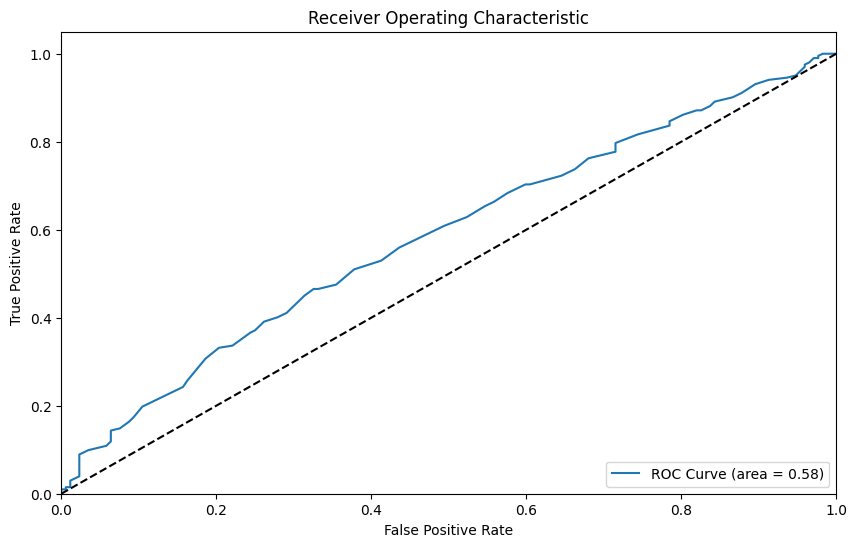

In [46]:
# data visualization of the results
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test['result_home']
y_prob = rf_model.predict_proba(x_test)[:, 1]  # Get probabilities

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()